In [45]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [46]:
!kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification

muffin-vs-chihuahua-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
import zipfile
zip_ref = zipfile.ZipFile('/content/muffin-vs-chihuahua-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [48]:
!unzip muffin-vs-chihuahua-image-classification.zip

Archive:  muffin-vs-chihuahua-image-classification.zip
replace test/chihuahua/img_0_1071.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [50]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


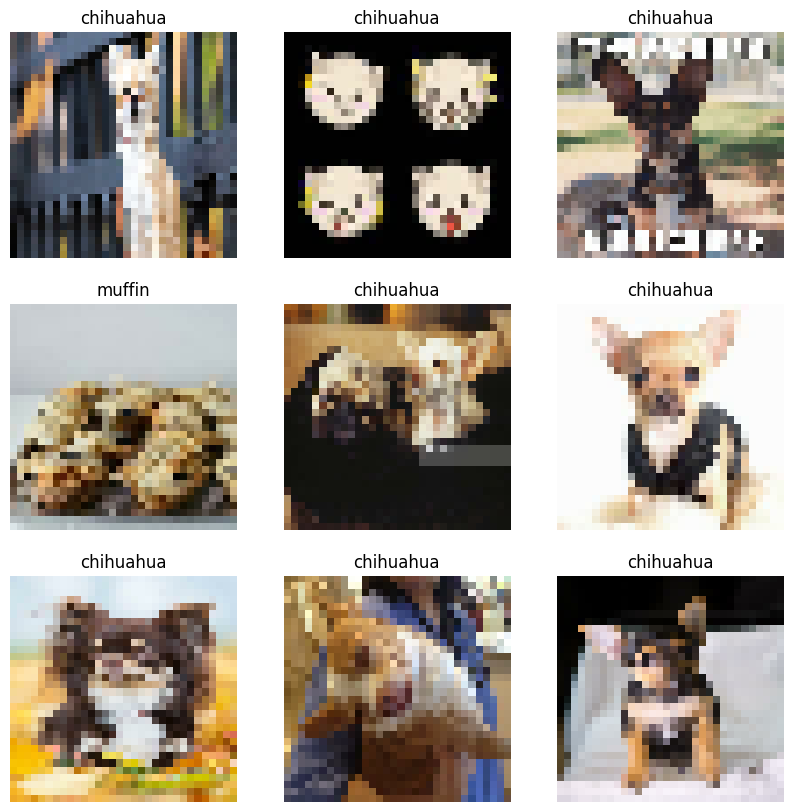

In [51]:
class_names = ["chihuahua", "muffin"]
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [52]:
model = tf.keras.Sequential(
[
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation = "relu"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation = "relu"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation = "relu"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation= "relu"),
  tf.keras.layers.Dense(3)
]
)

In [53]:
model.compile(
    optimizer = 'adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']

)

In [54]:
model.fit(
    train_ds,
    epochs = 10
)

Epoch 1/10
237/237 [==============================] - 21s 80ms/step - loss: 0.5997 - accuracy: 0.6622
Epoch 2/10
237/237 [==============================] - 19s 79ms/step - loss: 0.4354 - accuracy: 0.8029
Epoch 3/10
237/237 [==============================] - 19s 77ms/step - loss: 0.3780 - accuracy: 0.8409
Epoch 4/10
237/237 [==============================] - 20s 82ms/step - loss: 0.3423 - accuracy: 0.8601
Epoch 5/10
237/237 [==============================] - 19s 77ms/step - loss: 0.3111 - accuracy: 0.8737
Epoch 6/10
237/237 [==============================] - 20s 82ms/step - loss: 0.2668 - accuracy: 0.8935
Epoch 7/10
237/237 [==============================] - 19s 77ms/step - loss: 0.2432 - accuracy: 0.9056
Epoch 8/10
237/237 [==============================] - 19s 76ms/step - loss: 0.2110 - accuracy: 0.9138
Epoch 9/10
237/237 [==============================] - 20s 82ms/step - loss: 0.1782 - accuracy: 0.9324
Epoch 10/10
237/237 [==============================] - 19s 77ms/step - loss: 0.177

In [55]:
model.evaluate(test_ds)

60/60 [==============================] - 5s 79ms/step - loss: 0.5245 - accuracy: 0.8336


[0.5244562029838562, 0.8336148858070374]

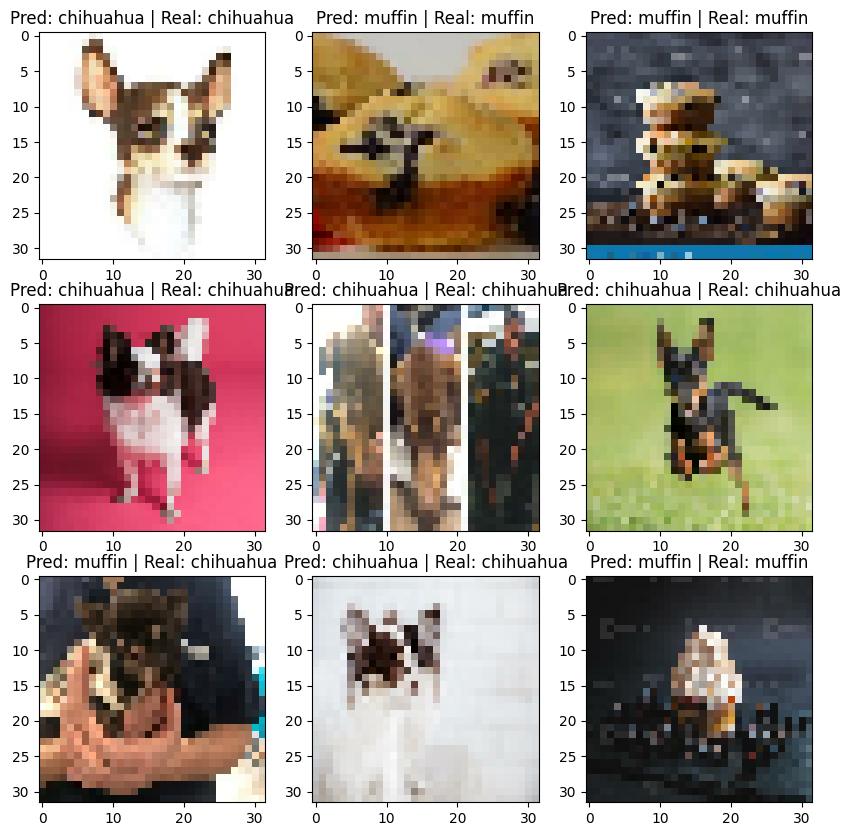

In [56]:
import numpy

plt.figure(figsize = (10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])